In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


Description:
# The problem involves classifying 32x32 color images from the CIFAR-10 dataset into 10 different classes. The goal is to build a deep learning model that can accurately classify these images.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


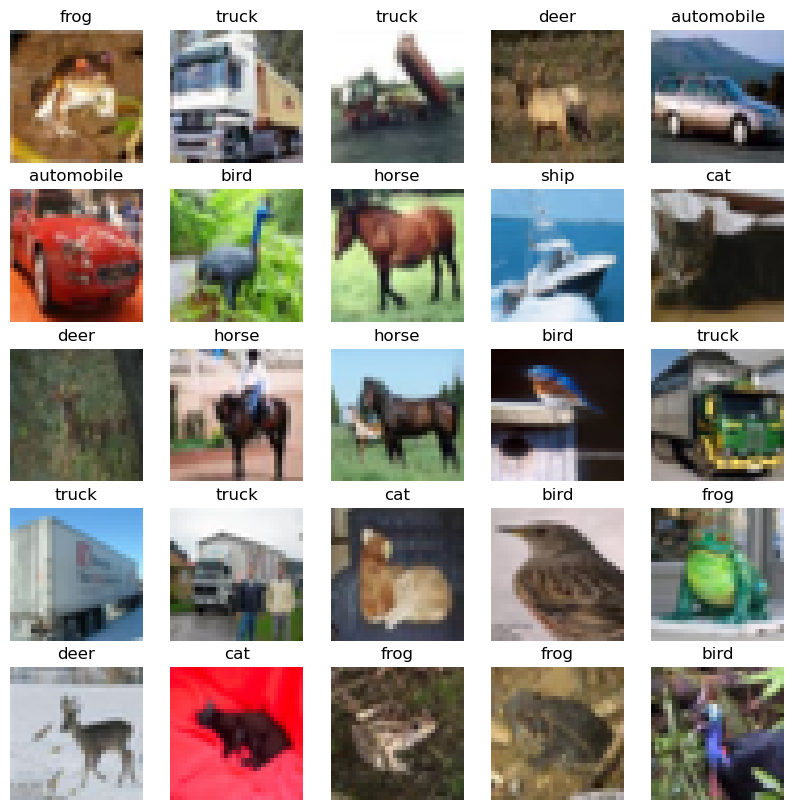

In [11]:
# Visualize sample images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


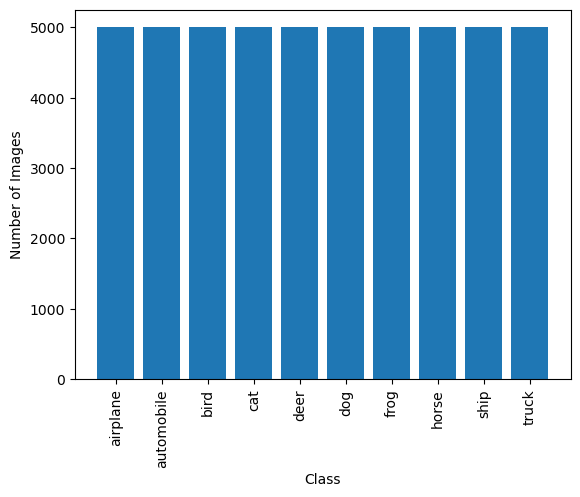

In [12]:
# Analyze class distribution
class_counts = np.bincount(y_train.flatten())
plt.bar(range(len(class_counts)), class_counts)
plt.xticks(range(len(class_counts)), class_names, rotation='vertical')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

In [13]:
# Data preprocessing
num_classes = 10
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes).reshape(-1, num_classes)
y_test = to_categorical(y_test, num_classes).reshape(-1, num_classes)

In [14]:
# Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [15]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Train the model
epochs = 10
batch_size = 32
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/10
1407/1407 [==============================] - 159s 112ms/step - loss: 1.3411 - accuracy: 0.5186 - val_loss: 1.0570 - val_accuracy: 0.6242
Epoch 2/10
1407/1407 [==============================] - 157s 112ms/step - loss: 0.8829 - accuracy: 0.6925 - val_loss: 0.8395 - val_accuracy: 0.7132
Epoch 3/10
1407/1407 [==============================] - 156s 111ms/step - loss: 0.7190 - accuracy: 0.7501 - val_loss: 0.7546 - val_accuracy: 0.7352
Epoch 4/10
1407/1407 [==============================] - 156s 111ms/step - loss: 0.5822 - accuracy: 0.7965 - val_loss: 0.8267 - val_accuracy: 0.7256
Epoch 5/10
1407/1407 [==============================] - 157s 111ms/step - loss: 0.4654 - accuracy: 0.8374 - val_loss: 0.7986 - val_accuracy: 0.7440
Epoch 6/10
1407/1407 [==============================] - 156s 111ms/step - loss: 0.3634 - accuracy: 0.8720 - val_loss: 0.8633 - val_accuracy: 0.7458
Epoch 7/10
1407/1407 [==============================] - 157s 111ms/step - loss: 0.2792 - accuracy: 0.9008 - val_

In [17]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

Test Loss: 1.4681077003479004
Test Accuracy: 0.7148000001907349


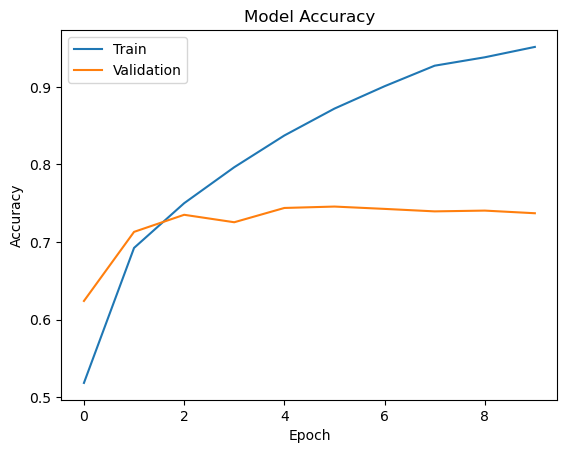

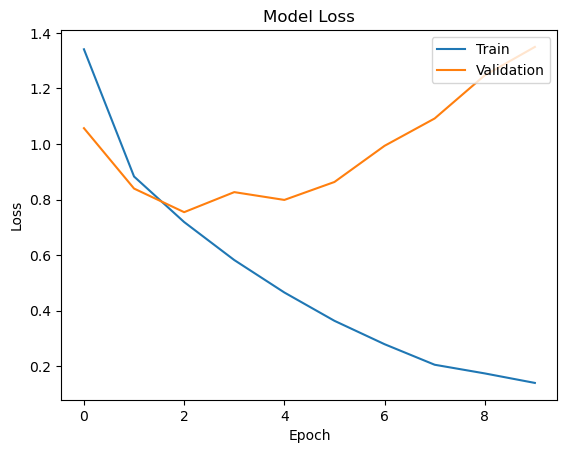

In [18]:
# Plot accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [19]:
history.history['accuracy']

[0.5186222195625305,
 0.6925333142280579,
 0.7501333355903625,
 0.796488881111145,
 0.8373555541038513,
 0.871999979019165,
 0.9007999897003174,
 0.9272666573524475,
 0.9380888938903809,
 0.9514444470405579]

In [20]:
history.history['val_accuracy']

[0.6241999864578247,
 0.7131999731063843,
 0.7351999878883362,
 0.725600004196167,
 0.7440000176429749,
 0.7458000183105469,
 0.7427999973297119,
 0.7396000027656555,
 0.7405999898910522,
 0.7372000217437744]

In [21]:
history.history['loss']

[1.3410676717758179,
 0.8829171061515808,
 0.718995988368988,
 0.5822219848632812,
 0.4653724730014801,
 0.363355427980423,
 0.2791546583175659,
 0.20519103109836578,
 0.17398878931999207,
 0.13973847031593323]

In [22]:
history.history['val_loss']

[1.0569509267807007,
 0.8395423889160156,
 0.754565954208374,
 0.8267192244529724,
 0.7986494898796082,
 0.863266110420227,
 0.993446946144104,
 1.0919100046157837,
 1.2472347021102905,
 1.349549651145935]

In [23]:
best_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_accuracy = history.history['val_accuracy'][best_epoch - 1]

print("Best Epoch:", best_epoch)
print("Best Validation Accuracy:", best_val_accuracy)


Best Epoch: 6
Best Validation Accuracy: 0.7458000183105469


In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Define a function to create the model
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create a KerasClassifier with the create_model function
keras_model = KerasClassifier(build_fn=create_model)

# Define hyperparameters to tune
param_grid = {
    'epochs': [10, 20],
    'batch_size': [32, 64]
}

# Perform grid search to find the best model
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train, y_train)

# Print the best hyperparameters and model performance
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Assign the best model to the variable 'model'
model = grid_result.best_estimator_.model

# Evaluate the best model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


/tmp/ipykernel_32/1810604148.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model)


Epoch 1/10
1042/1042 [==============================] - 114s 109ms/step - loss: 1.3760 - accuracy: 0.5087
Epoch 2/10
1042/1042 [==============================] - 113s 108ms/step - loss: 0.9409 - accuracy: 0.6721
Epoch 3/10
 553/1042 [==============>...............] - ETA: 52s - loss: 0.7523 - accuracy: 0.7367